In [1]:
import numpy as np
from code import GameMap

ImportError: cannot import name 'GameMap' from 'code' (C:\Users\kzvda\Anaconda3\envs\tabnine\lib\code.py)

In [17]:
import os
import random

import numpy as np
from PIL import Image

# Tile direction format
__tile_dirs = [  # TODO: change to a more readable format ('left', 'right', etc.)
    0,  # ->
    90,  # ↑
    180,  # <-
    270,  # ↓
]

# Shape of the game map
__map_shape = (13, 13)

# All game tiles in format {tile_type}:{amount}
__all_tiles = {
    'empty': 40,
    'dir_straight': 3,
    'dir_45': 3,
    'dir_45_225': 3,
    'dir_0_180': 3,
    'dir_0_135_270': 3,
    'dir_diagonal': 3,
    'dir_uplr': 3,
    'horses': 2,
    'spinning_2': 5,
    'spinning_3': 4,
    'spinning_4': 2,
    'spinning_5': 1,
    'ice_lake': 6,
    'trap': 3,
    'cannon': 2,
    'fort': 2,
    'aborigine': 1,
    'drinking_rum': 4,
    'crocodile': 4,
    'ogre': 1,
    'baloon': 2,
    'plane': 1,
    'money_1': 5,
    'money_2': 5,
    'money_3': 3,
    'money_4': 2,
    'money_5': 1,
}


class Tile:
    def __init__(self, tile_type, direction):
        self.tile_type = tile_type
        self.direction = direction
        self.is_open = False
        self.objects = []

    def open(self):
        self.is_open = True
        pass

    def step(self, pirate, direction):
        pass


def __is_in_water(x, y):
    """Check if this coordinates are in water."""
    return (
            x == 0 or y == 0 or
            x == 12 or y == 12 or
            (x == 1 and y == 1) or
            (x == 11 and y == 11) or
            (x == 1 and y == 11) or
            (x == 11 and y == 1)
    )


def __prob_dist(tiles):
    """Get the probability distribution of tiles."""
    dist = []
    total = sum(tiles.values())
    for num in tiles.values():
        dist.append(num / total)
    return dist

def get_side_center_coords(side):
    """Get the starting coordinates for a given side.
    :param side: {0: <-, 1: ↑, 2: ->, 3: ↓}
    :return: tuple of coordinates (x, y)
    """
    axis_centers = list(map(lambda x: np.ceil(x / 2.0), __map_shape))
    return {
        0: (0, axis_centers[1]),
        1: (axis_centers[0], __map_shape[1] - 1),
        2: (__map_shape[0] - 1, axis_centers[1]),
        3: (axis_centers[0], 0),
    }[side]


def create_map():
    """Create a random game map.

    :return: numpy array with Tile values."""
    game_map = np.empty(__map_shape, dtype=Tile)
    tiles = __all_tiles.copy()
    for x in range(__map_shape[0]):
        for y in range(__map_shape[1]):
            # Check if this is a water tile
            if __is_in_water(x, y):
                tile_type = 'water'
            else:
                tile_type = np.random.choice(
                    list(tiles), 1, p=__prob_dist(tiles))[0]
                tiles[tile_type] -= 1

                # If no tiles of this type left, delete them
                if not tiles[tile_type]:
                    del tiles[tile_type]

            # Set random direction
            tile_dir = random.sample(__tile_dirs, 1)[0]
            game_map[y][x] = Tile(tile_type, tile_dir)

    assert len(tiles) == 0, 'All tiles must be used during the map creation!'
    return game_map


def resize_and_rotate_img(tile_img, tile_shape, direction):
    """Resize and rotate an image.

    :param tile_img: Image to process
    :param tile_shape: Shape to be matched
    :param direction: Rotation direction in `__tile_dirs` key format
    :return: Processed image
    """

    res_img = tile_img.copy()
    res_img = res_img.resize(tile_shape)

    if direction:
        res_img = res_img.rotate(direction)

    return res_img


def map_to_img(game_map, players=None, tile_shape=(64, 64)):
    """Create a full image of a map."""
    map_img = np.zeros(
        (tile_shape[0] * game_map.shape[0],
         tile_shape[1] * game_map.shape[1], 3),
        dtype=np.uint8)
    closed_tile_img = Image.open(os.path.join(
                'tile_images', 'back.png'))
    for (x, y), tile in np.ndenumerate(game_map):
        if tile.tile_type == 'water':  
            tile_img = np.zeros((*tile_shape, 3))  # TODO: Add 'water' tile image.
        else:
            if not tile.is_open:
                tile_img = closed_tile_img
            else:
                tile_img = Image.open(os.path.join(
                    'tile_images', tile.tile_type + '.png'))
            tile_img = resize_and_rotate_img(
                tile_img, tile_shape, tile.direction)
        map_img[x * tile_shape[0]:(x + 1) * tile_shape[0],
        y * tile_shape[1]:(y + 1) * tile_shape[1]] = tile_img
    return Image.fromarray(map_img)

https://cdn.mosigra.ru/mosigra.product.other/545/275/01_Jackal_rules_print_590301.pdf

https://jackal.su/usefulness/handmade

In [18]:
game_map = create_map()

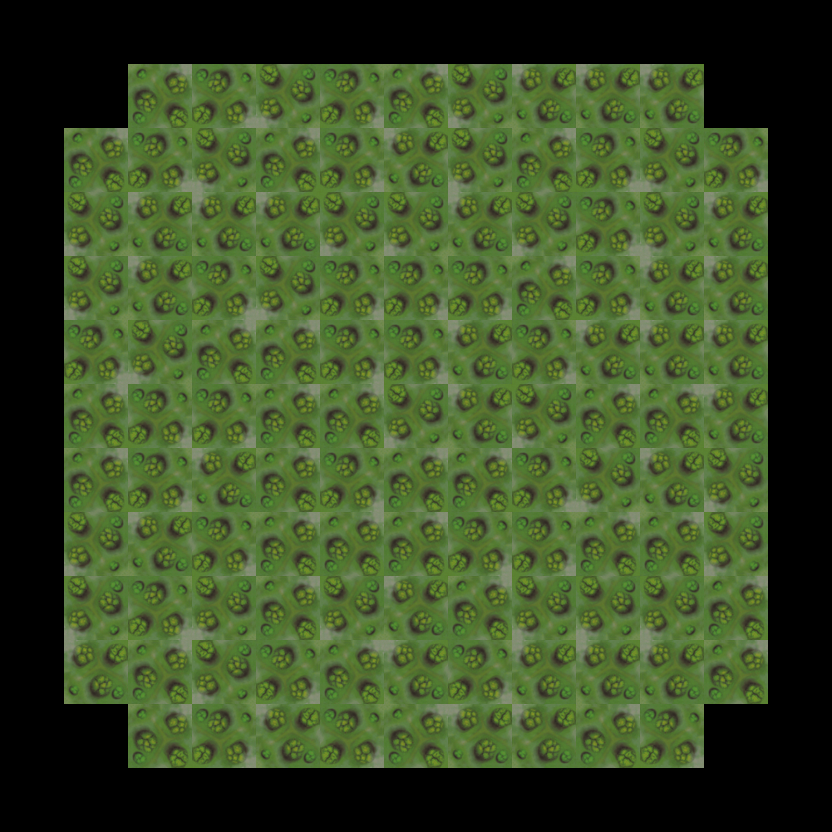

In [19]:
res_img = map_to_img(game_map)
res_img

In [5]:
res_img.save('res.png')